In [9]:
!mkdir -p ~/.kaggle/



In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle competitions list  

401 - Unauthorized


In [12]:
!kaggle competitions download titanic

401 - Unauthorized


In [13]:
#This program predicts if a passenger will survive on the titanic

In [14]:
#import lib
import numpy as np
import pandas as pd
import seaborn as sns  #lib mainly for drawing
import matplotlib.pyplot as plt

In [15]:
#load data
titanic = pd.read_csv('train.csv')  #same as sns.load_dataset('titanic)

#print the first 10 rows of the data
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
#count the number of rows and columns in the data set
titanic.shape

(891, 12)

In [17]:
#Get some statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#get a count of the number of suvivors
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

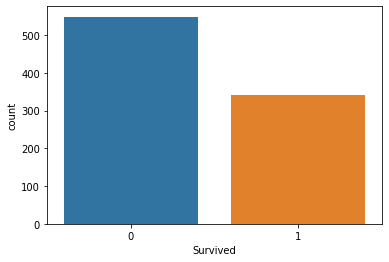

In [19]:
#visualize the count of suvivors
sns.countplot(titanic['Survived'])   #super useful

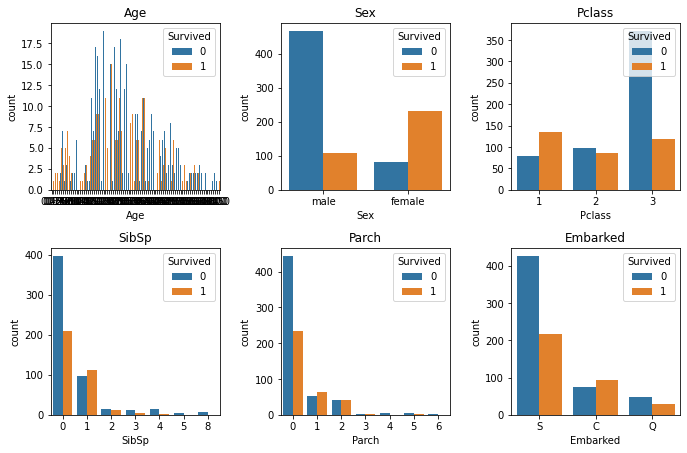

In [20]:
#visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked' 
cols = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

#the subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):

    i = r*n_cols + c  #index to go through the number of columns
    ax = axs[r][c] #show where to position each sub plot
    sns.countplot(titanic[cols[i]], hue=titanic['Survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived', loc = 'upper right')

plt.tight_layout()

In [21]:
#Look at suvival rate by sex
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [22]:
#Look at survival rate by sex and class
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


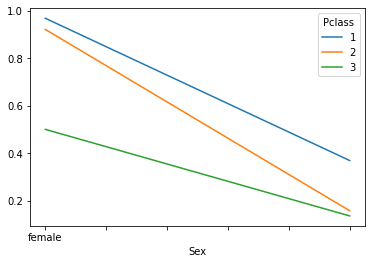

In [23]:
#Look at survival rate by sex and class visually
titanic.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

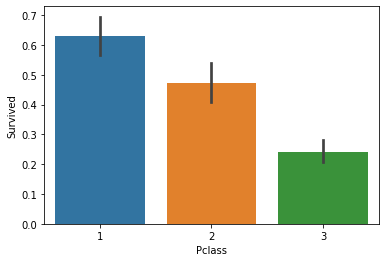

In [24]:
#plot the survival rate of each class
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [25]:
#look at survial rate by sex, age and class
age = pd.cut(titanic['Age'], [0,18,80])
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

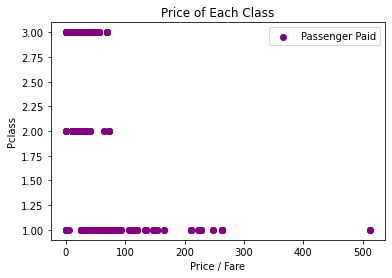

In [26]:
#Plot the prices paid of each class
plt.scatter(titanic['Fare'], titanic['Pclass'], color='purple', label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [27]:
#Count the empty values and each column
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
#look at all of the values in each column and get a count
for val in titanic:
  print(titanic[val].value_counts())
  print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Davis, Miss. Mary                            1
Clifford, Mr. George Quincy                  1
Cardeza, Mr. Thomas Drake Martinez           1
Milling, Mr. Jacob Christian                 1
Panula, Mr. Ernesti Arvid                    1
                                            ..
Meyer, Mr. August                            1
Zabour, Miss. Hileni                         1
Stoytcheff, Mr. Ilia                         1
Yasbeck, Mr. Antoni                          1
Mellinger, Mrs. (Elizabeth Anne Maidment)    1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, 

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#drop the column
titanic_new = titanic.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1)

#remove the rows with missing values
titanic_new = titanic_new.dropna( subset = ['Age', 'Embarked'])
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
titanic_new.shape

(712, 8)

In [32]:
titanic_new.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [33]:
#print the unique values in the columns
print(titanic_new['Sex'].unique())
print(titanic_new['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode the sex column
titanic_new.iloc[:, 2] = labelencoder.fit_transform(titanic_new.iloc[:,2].values)

#encode the embarked column
titanic_new.iloc[:, 7] = labelencoder.fit_transform(titanic_new.iloc[:,7].values)

In [35]:
#print the unique values in the columns
print(titanic_new['Sex'].unique())
print(titanic_new['Embarked'].unique())

[1 0]
[2 0 1]


In [36]:
titanic_new.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [37]:
#split the data into independent x and dependent y variables
X = titanic_new.iloc[:, 1:8].values
Y = titanic_new.iloc[:, 0].values

In [38]:
#Split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [39]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
#creare a function with many machine learning models
def models(X_train, Y_train):
  #use logistic regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  #use KNeighbors
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
  knn.fit(X_train, Y_train)

  #use SVC (linear kernel)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #use GaussianNB
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #print the training accuracy for each model
  print('[0]Logistic Regression Training Accurancy: ',log.score(X_train, Y_train))
  print('[1]K Neighbors Training Accurancy: ',knn.score(X_train, Y_train))
  print('[2]SVC Linear Training Accurancy: ',svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF Training Accurancy: ',svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian NB Training Accurancy: ',gauss.score(X_train, Y_train))
  print('[5]Decision Tree Training Accurancy: ',tree.score(X_train, Y_train))
  print('[6]Random Forest Training Accurancy: ',forest.score(X_train, Y_train))

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [41]:
#get and train all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accurancy:  0.7978910369068541
[1]K Neighbors Training Accurancy:  0.8664323374340949
[2]SVC Linear Training Accurancy:  0.7768014059753954
[3]SVC RBF Training Accurancy:  0.8506151142355008
[4]Gaussian NB Training Accurancy:  0.8031634446397188
[5]Decision Tree Training Accurancy:  0.9929701230228472
[6]Random Forest Training Accurancy:  0.9753954305799648


In [42]:
 #show the confusion matrix and accurancy for all of the models for test data
 from sklearn.metrics import confusion_matrix

 for i in range(len(model)):
   cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extract TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

   test_score = (TP + TN) / (TP + TN + FN + FP)

   print(cm)
   print('Model[{}] Testig Accuracy = "{}"'.format(i, test_score))
   print()

[[75  7]
 [19 42]]
Model[0] Testig Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testig Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testig Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testig Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testig Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testig Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testig Accuracy = "0.8391608391608392"



In [43]:
 #get feature importance
 forest = model[6]
 importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
 importances = importances.sort_values('importance', ascending = False).set_index('feature')
 importances

,importance
feature,
Name,0.300
SibSp,0.296
Pclass,0.183
Survived,0.098
Sex,0.050
Age,0.044
Parch,0.030


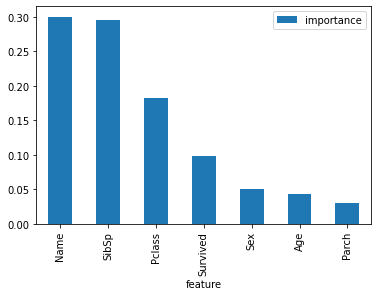

In [44]:
#visualize the importance
importances.plot.bar()

In [47]:
#print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)

print()

#print the actual values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [65]:
#my survival
my_survial = [[1, 0, 23, 1, 2, 200, 1]]

#scaling my survival
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survial)

#print prediction of my survival using Random Forest Classifier
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('You did not make it')
else:
  print('You survived!')


[0]
You did not make it
